In [3]:
import pandas as pd
import numpy as np
ploan = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name=1, index_col=0)

In [4]:
ploan.head()

,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4.0,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3.0,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1.0,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1.0,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4.0,1.0,2,0,0,0,0,0,1


In [5]:
ploan.dtypes

Age (in years)             int64
Experience (in years)      int64
Income (in K/month)        int64
ZIP Code                   int64
Family members           float64
CCAvg                    float64
Education                  int64
Mortgage                   int64
Personal Loan              int64
Securities Account         int64
CD Account                 int64
Online                     int64
CreditCard                 int64
dtype: object

In [6]:
ploan.describe()

,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,4982.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.39723,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.14716,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.00000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.00000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.00000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.00000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
# Check if any columns have non numeric values
ploan[~ploan.applymap(np.isreal).all(1)]

,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,


In [8]:
# Check for missing values
ploan.isnull().values.any()

True

In [9]:
ploan.isnull().sum()
# Family members has 18 missing values

Age (in years)            0
Experience (in years)     0
Income (in K/month)       0
ZIP Code                  0
Family members           18
CCAvg                     0
Education                 0
Mortgage                  0
Personal Loan             0
Securities Account        0
CD Account                0
Online                    0
CreditCard                0
dtype: int64

In [10]:
# replace missing values with median 
ploan = ploan.fillna(ploan.median())
# verify that null values have been replaced
ploan.isnull().values.any()


False

In [11]:
ploan.describe()

,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.39580,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.14534,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.00000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.00000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.00000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.00000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [12]:
ploan.rename(columns = {"Age (in years)" : 'Age', "Experience (in years)" : 'Experience', "Family members" : 'Family',
                       'Personal Loan' : 'Ploan', 'Securities Account' : 'Securities', 'CD Account': 'CD',
                       "Income (in K/month)" : 'Income', 'ZIP Code' : 'Zip'}, 
             inplace = True)
ploan.columns

Index(['Age', 'Experience', 'Income', 'Zip', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Ploan', 'Securities', 'CD', 'Online', 'CreditCard'],
      dtype='object')

In [13]:
#check for distribution of data against the dependent variable Ploan'
ploan.groupby(['Ploan']).count()
# The model will be better able to predict 0 since almost 90% data has 0 ploan

,Age,Experience,Income,Zip,Family,CCAvg,Education,Mortgage,Securities,CD,Online,CreditCard
Ploan,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480


In [14]:
ploan.groupby('Ploan').mean() #means for age & experience seem similar for 0 and 1 of Ploan

,Age,Experience,Income,Zip,Family,CCAvg,Education,Mortgage,Securities,CD,Online,CreditCard
Ploan,,,,,,,,,,,,
0,45.367257,20.132301,66.237389,93152.428761,2.373009,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,93153.202083,2.610417,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [15]:
#check for outliers for numeric variables
#subset of dataset with only continuous variables
p_cnt = ploan[['Age', 'Experience', 'Income', 'Family', 'CCAvg','Mortgage']]
q1 = p_cnt.quantile(0.25)
q3 = p_cnt.quantile(0.75)
iqr = q3-q1



In [16]:
# remove outliers basis 1.5IQR
ploan2 = ploan[~((p_cnt<(q1-1.5*iqr))|(p_cnt>(q3+1.5*iqr))).any(axis=1)]

In [17]:
ploan2.count()

Age           4398
Experience    4398
Income        4398
Zip           4398
Family        4398
CCAvg         4398
Education     4398
Mortgage      4398
Ploan         4398
Securities    4398
CD            4398
Online        4398
CreditCard    4398
dtype: int64

In [18]:
#Check if we have sufficient data for 0 and 1 in Ploan after removing outliers
ploan2.groupby('Ploan').count()

,Age,Experience,Income,Zip,Family,CCAvg,Education,Mortgage,Securities,CD,Online,CreditCard
Ploan,,,,,,,,,,,,
0,4125,4125,4125,4125,4125,4125,4125,4125,4125,4125,4125,4125
1,273,273,273,273,273,273,273,273,273,273,273,273


In [19]:
#Check group counts in discrete variables for any data sparsity/ cardinality (high cardinality in Zip)
ploan2[['Family','Education','Securities','CD','Online','CreditCard']].apply(pd.value_counts)

,Family,Education,Securities,CD,Online,CreditCard
0.0,NaN,NaN,3939.0,4191.0,1786.0,3098.0
1.0,1268.0,1718.0,459.0,207.0,2612.0,1300.0
2.0,1069.0,1301.0,NaN,NaN,NaN,NaN
3.0,924.0,1379.0,NaN,NaN,NaN,NaN
4.0,1137.0,NaN,NaN,NaN,NaN,NaN


###### Attempting to work with Zip code data  - the plots show high overlap but want to check if we reduce cardinality, will that show any patterns. Also I read about impact encoding and weight of evidence methods but not sure how to try those (perhaps if these concepts could be covered in class, that would be helpful)

In [20]:
# Working with zip code data
ploan2['Zip'].min() 
#need to precede 4 digit zip codes with zero

9307

In [21]:
#convert zip to string and check for zip code lengths < 5
ploan2['Zip'] = ploan2['Zip'].astype('str')
ploan2[ploan2['Zip'].str.len()<5] 
# only one value has 4 digits 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Age,Experience,Income,Zip,Family,CCAvg,Education,Mortgage,Ploan,Securities,CD,Online,CreditCard
ID,,,,,,,,,,,,,
385,51,25,21,9307,4.0,0.6,3,0,0,0,0,1,1


In [22]:
#update the 4 digit value to 5 digits by adding preceding 0
ploan2.at[385,'Zip'] = '09307'
ploan2.loc[385,'Zip']

'09307'

In [23]:
ck = ploan2['Zip'].value_counts()
print(sorted(ck))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 

In [24]:
#Use only first 3 digits of zip code that represent a region and check the number of groups

#ploan2['Zip1'] = ploan2['Zip'][:2]
ploan2['Zip_sub'] = ploan2['Zip'].str[0:3]
ploan2['Zip_sub'].nunique()



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


58

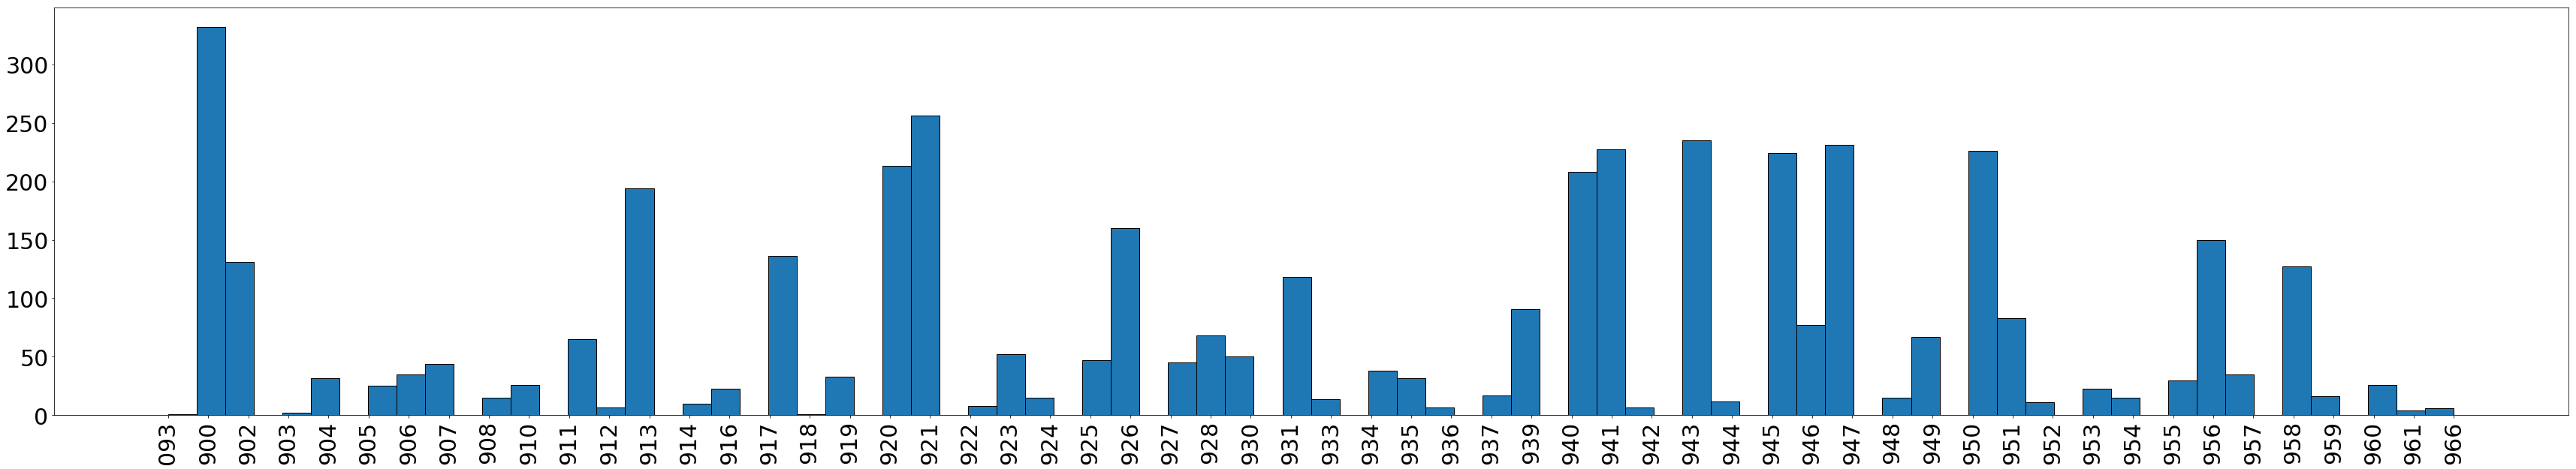

In [28]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

p = ploan2['Zip_sub']
#p.value_counts().plot(kind='bar')

plt.figure(figsize=(60,10))
plt.hist(p, bins = 80, ec='black')
plt.xticks(fontsize = 30, rotation = 'vertical') 
plt.yticks(fontsize = 30) 
plt.show()


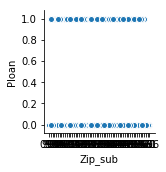

In [27]:
import seaborn as sns
sns.pairplot(ploan2, x_vars = ['Zip_sub'],y_vars = ['Ploan'])
#  We continue to see overlap of 0 and 1 across regions therefore will drop this variable

In [29]:
ploan2.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Ploan,Securities,CD,Online,CreditCard
count,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000
mean,45.536608,20.280355,64.084584,2.438836,1.551146,1.922920,38.490678,0.062074,0.104366,0.047067,0.593906,0.295589
std,11.490289,11.509410,38.024646,1.157688,1.157534,0.835704,68.108115,0.241317,0.305769,0.211806,0.491158,0.456359
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,35.000000,1.000000,0.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,20.000000,58.000000,2.000000,1.400000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,56.000000,30.000000,83.000000,4.000000,2.200000,3.000000,83.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,185.000000,4.000000,5.200000,3.000000,252.000000,1.000000,1.000000,1.000000,1.000000,1.000000


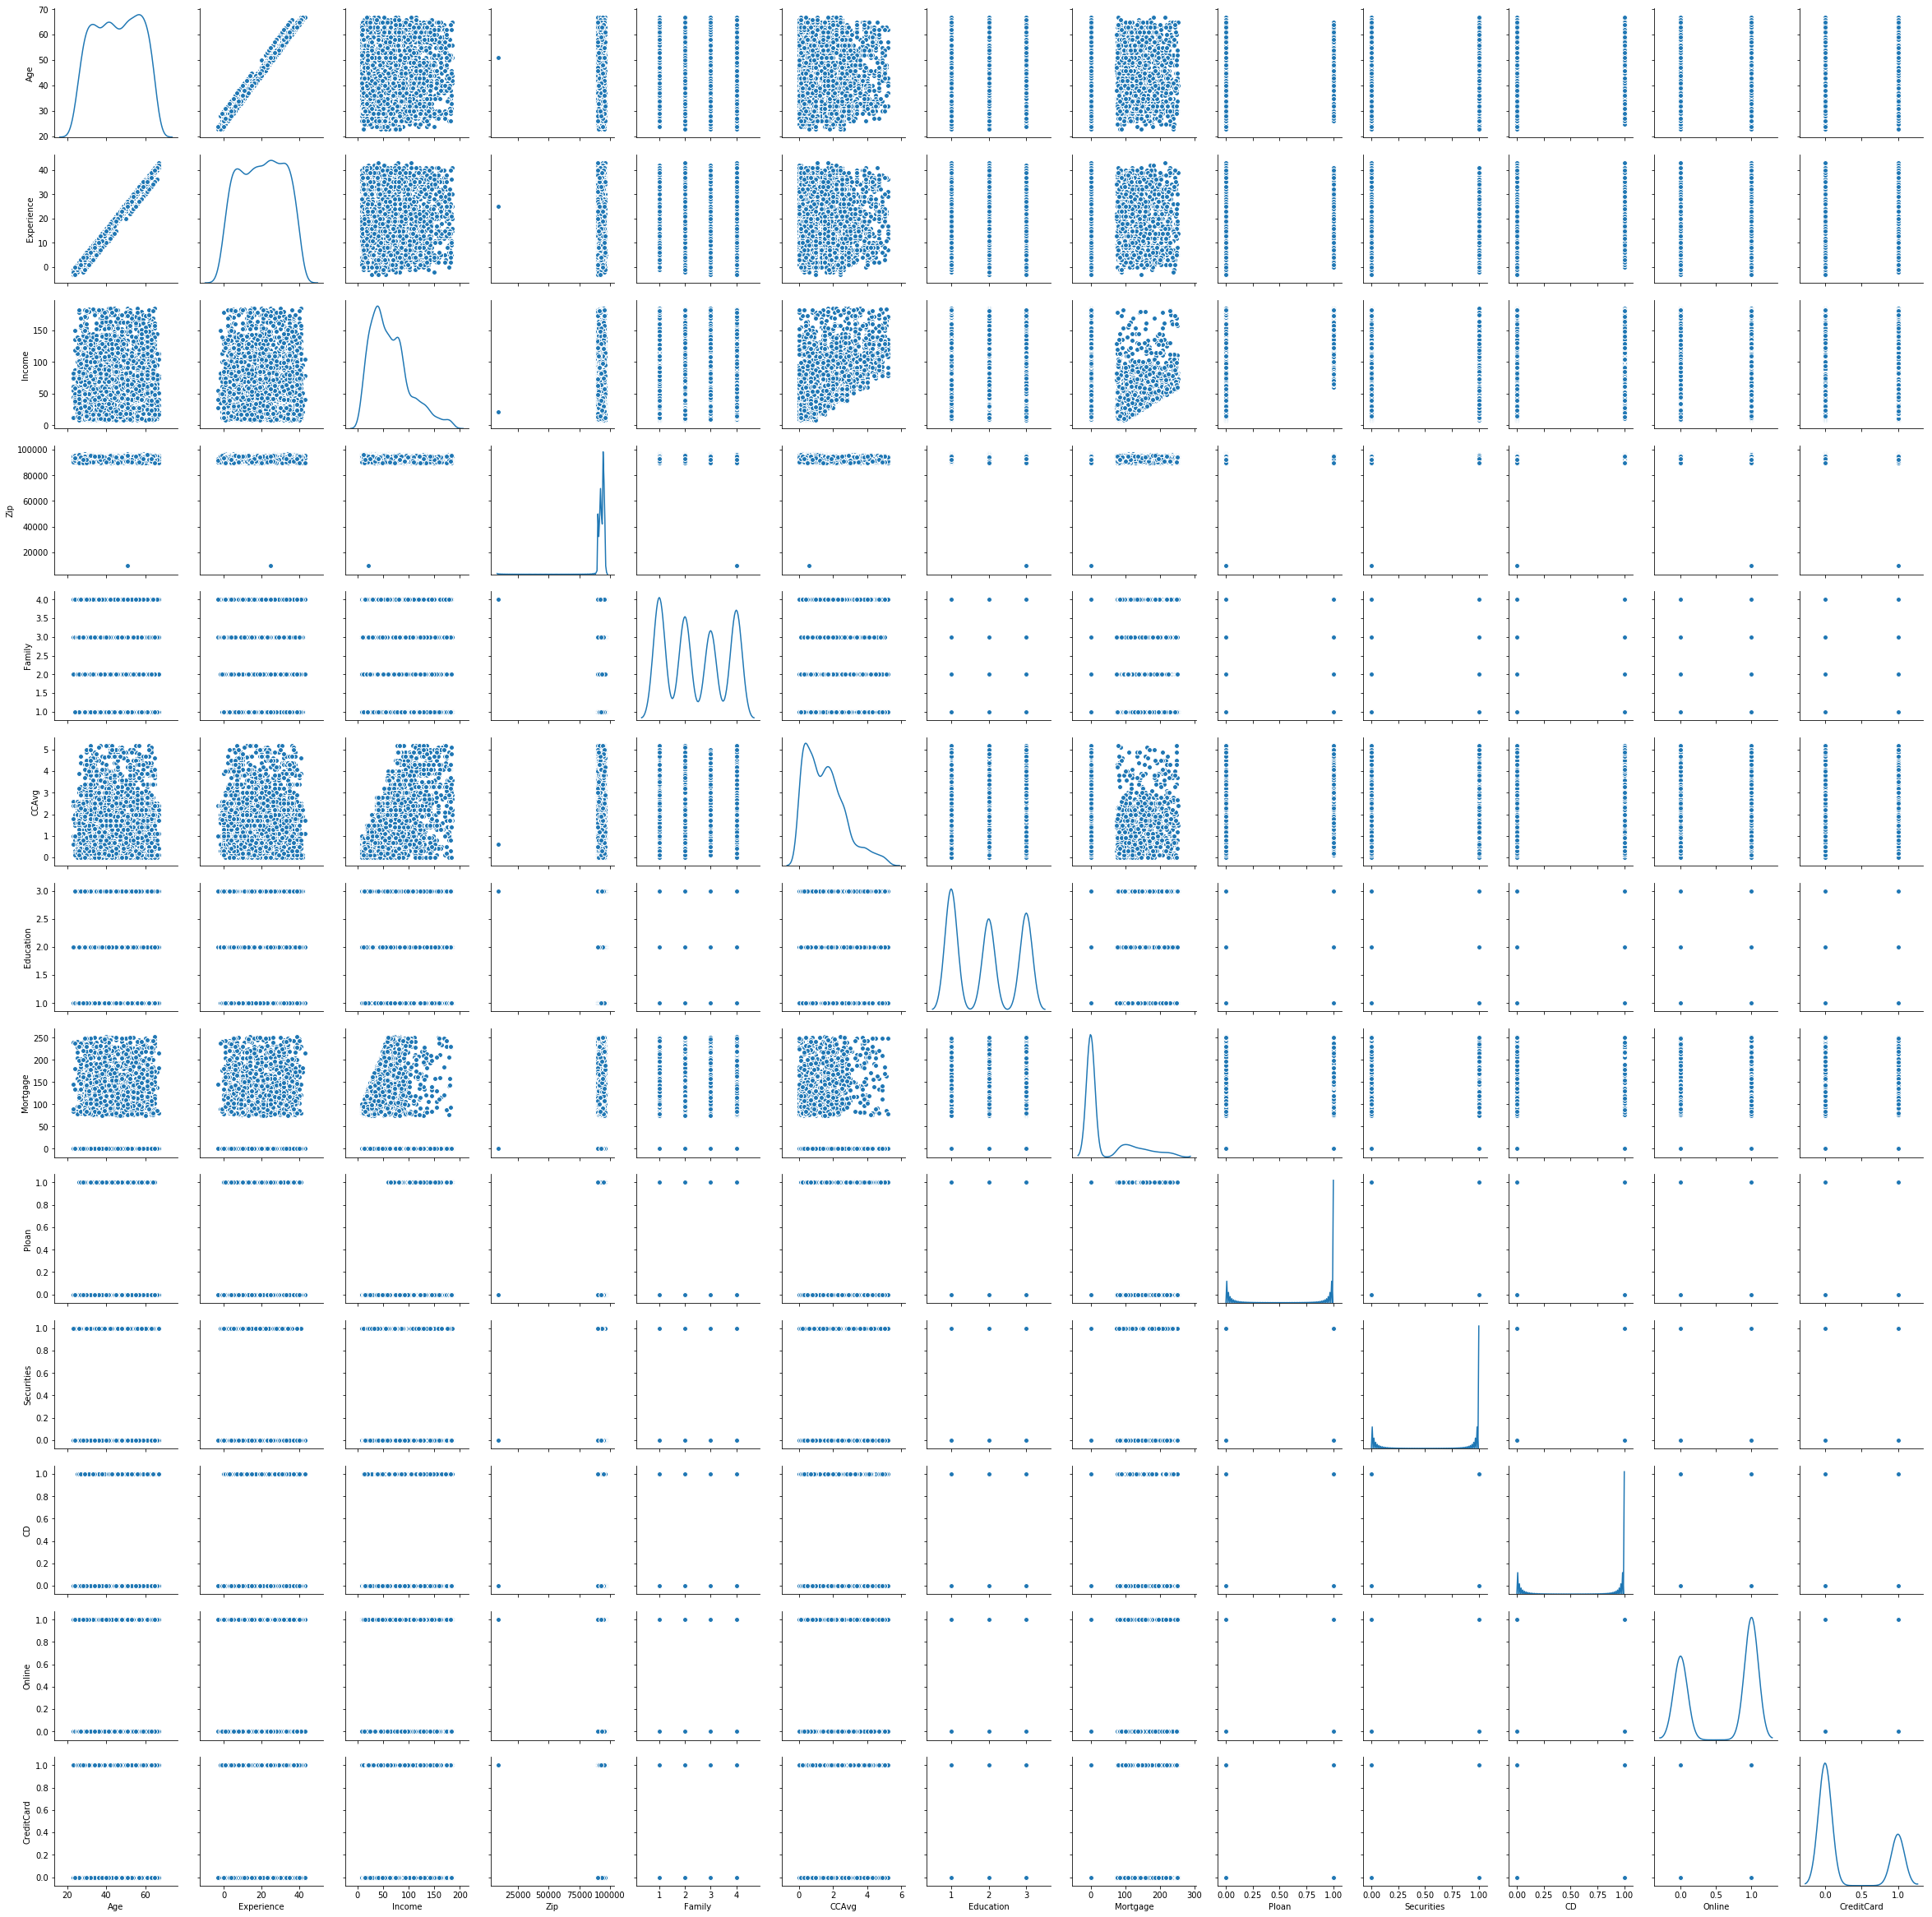

In [87]:
sns.pairplot(ploan2, diag_kind = 'kde')

In [30]:
#Check for multicollinearity for continuous variables
ploan2.corr()
# Age and experience are highly correlated so we can drop one of these


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Ploan,Securities,CD,Online,CreditCard
Age,1.000000,0.994115,-0.035804,-0.057799,-0.023779,0.034672,-0.007577,-0.015132,0.005677,0.005973,0.018553,0.011078
Experience,0.994115,1.000000,-0.028003,-0.062814,-0.026405,0.006740,-0.006866,-0.011917,0.004286,0.008487,0.018213,0.012537
Income,-0.035804,-0.028003,1.000000,-0.137520,0.518550,-0.149095,-0.056477,0.466305,0.001725,0.114803,0.004190,0.004247
Family,-0.057799,-0.062814,-0.137520,1.000000,-0.057472,0.022747,0.026995,0.013186,0.024141,0.000149,0.013903,0.000221
CCAvg,-0.023779,-0.026405,0.518550,-0.057472,1.000000,-0.070689,-0.018175,0.328350,0.020410,0.082784,-0.021219,-0.002066
Education,0.034672,0.006740,-0.149095,0.022747,-0.070689,1.000000,0.010542,0.097033,-0.015682,-0.006481,-0.024194,-0.017171
Mortgage,-0.007577,-0.006866,-0.056477,0.026995,-0.018175,0.010542,1.000000,-0.027384,-0.009023,0.009639,-0.010379,-0.001902
Ploan,-0.015132,-0.011917,0.466305,0.013186,0.328350,0.097033,-0.027384,1.000000,0.016977,0.245397,-0.015612,-0.005567
Securities,0.005677,0.004286,0.001725,0.024141,0.020410,-0.015682,-0.009023,0.016977,1.000000,0.320952,0.005144,-0.019029
CD,0.005973,0.008487,0.114803,0.000149,0.082784,-0.006481,0.009639,0.245397,0.320952,1.000000,0.157538,0.258376


In [47]:
# One way Anovas to for selecting continuous variables
import scipy.stats as stats
ploan_0 = ploan2[ploan2['Ploan']==0][['Age', 'Experience', 'Income', 'Family', 'CCAvg','Mortgage']]
ploan_1 = ploan2[ploan2['Ploan']==1][['Age', 'Experience', 'Income', 'Family', 'CCAvg','Mortgage']]
stats.f_oneway(ploan_0,ploan_1)

#Income, CCAvg have significant difference in means between 0 and 1 of Ploan. 
#Based on p-values we can drop Age, Experience, Family, Mortgage

F_onewayResult(statistic=array([1.00686494e+00, 6.24411978e-01, 1.22146219e+03, 7.64495482e-01,
       5.31220932e+02, 3.29890448e+00]), pvalue=array([3.15710304e-001, 4.29455100e-001, 2.30613178e-236, 3.81973088e-001,
       4.62115107e-111, 6.93941858e-002]))

In [35]:
#for categorical data perform chi square tests to check for relationship of categorical variables with Ploan variable
from scipy.stats  import chi2_contingency
d1 = ploan2['Education'].astype('category')
cng = pd.crosstab(ploan2['Ploan'], d1)
chi2_contingency(cng)
#Education is significant


(52.64058301659648,
 3.70887875151854e-12,
 2,
 array([[1611.3574352 , 1220.24215553, 1293.40040928],
        [ 106.6425648 ,   80.75784447,   85.59959072]]))

In [37]:
d1 = ploan2['Securities'].astype('category')
cng = pd.crosstab(ploan2['Ploan'], d1)
chi2_contingency(cng)
# p value is high therefore not significant    

(1.0479516083343876,
 0.3059793219306512,
 1,
 array([[3694.49181446,  430.50818554],
        [ 244.50818554,   28.49181446]]))

In [38]:
d1 = ploan2['CreditCard'].astype('category')
cng = pd.crosstab(ploan2['Ploan'], d1)
chi2_contingency(cng)
# p value is high therefore not significant 

(0.09043328817579538,
 0.7636270404704846,
 1,
 array([[2905.6957708, 1219.3042292],
        [ 192.3042292,   80.6957708]]))

In [39]:
d1 = ploan2['Online'].astype('category')
cng = pd.crosstab(ploan2['Ploan'], d1)
chi2_contingency(cng)
# p value is high therefore not significant 

(0.9442885055246144,
 0.3311773826885456,
 1,
 array([[1675.13642565, 2449.86357435],
        [ 110.86357435,  162.13642565]]))

In [277]:
d1 = ploan2['CD'].astype('category')
cng = pd.crosstab(ploan2['Ploan'], d1)
chi2_contingency(cng)
# p value is low therefore  significant 

(260.0658497273788,
 1.6602079153669406e-58,
 1,
 array([[3930.84924966,  194.15075034],
        [ 260.15075034,   12.84924966]]))

In [ ]:
#Variables to keep in model Education, CD, Income, CCAvg

In [41]:
#Scale the variables
from sklearn import preprocessing
ploan_scaled = preprocessing.scale(ploan2)
ploan3 = pd.DataFrame(ploan_scaled, columns = ploan2.columns)
ploan3.head()


,Age,Experience,Income,Zip,Family,CCAvg,Education,Mortgage,Ploan,Securities,CD,Online,CreditCard,Zip_sub
0,-1.787504,-1.675372,-0.396751,-0.945435,1.348672,0.042210,-1.104487,-0.565205,-0.257258,2.929454,-0.222242,-1.209333,-0.647785,-0.931880
1,-0.046706,-0.111257,-0.791276,-1.414954,0.484783,-0.044190,-1.104487,-0.565205,-0.257258,2.929454,-0.222242,-1.209333,-0.647785,-1.438259
2,-0.568946,-0.458838,-1.396216,0.720943,-1.242994,-0.476192,-1.104487,-0.565205,-0.257258,-0.341361,-0.222242,-1.209333,-0.647785,0.725363
3,-0.917105,-0.980210,0.944637,0.440523,-1.242994,0.992614,0.092245,-0.565205,-0.257258,-0.341361,-0.222242,-1.209333,-0.647785,0.449156
4,-0.917105,-1.067105,-0.501957,-0.842583,1.348672,-0.476192,0.092245,-0.565205,-0.257258,-0.341361,-0.222242,-1.209333,1.543722,-0.839810


In [42]:
ploan2['Income'].corr(ploan2['CCAvg'])

0.5185502605475533

In [55]:
from sklearn.model_selection import train_test_split

x_arr = ploan3[['Income','CCAvg','Education','CD']]
y_arr = ploan2['Ploan']
X = x_arr.values
Y = y_arr.values
test_size = 0.30
seed = 5
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9598484848484848
[[1222   16]
 [  37   45]]


In [52]:
model.coef_[0]

array([2.03236713, 0.68545324, 1.22204207, 0.5185792 ])

In [48]:
from sklearn.metrics import classification_report
classification_report(y_test, y_predict)

'             precision    recall  f1-score   support\n\n          0       0.97      0.99      0.98      1238\n          1       0.74      0.55      0.63        82\n\navg / total       0.96      0.96      0.96      1320\n'

In [45]:
TP = 45
TN = 1222
FP = 16
FN = 37

Total = TP+TN+FP+FN

Accuracy = (TP+TN)/Total
ErrorRate = 1 - Accuracy
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

Accuracy, ErrorRate, Precision, Recall

(0.9598484848484848,
 0.04015151515151516,
 0.7377049180327869,
 0.5487804878048781)

### KNN ANALYSIS

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [59]:
#From Logistic steps, we have the training and test datasets:

NNH = KNeighborsClassifier(n_neighbors= 3)
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [60]:
predicted_labels = NNH.predict(X_test)

In [151]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

metrics.accuracy_score(y_test, predicted_labels)

0.9757575757575757

In [ ]:
#Accuracy of logisic was 96%. KNN has higher accuracy

In [114]:
#Determine optimal K





In [170]:
Ngh = []
Acc = []
cval = []
for n in range(1,20):
    if n%2 == 0:
        n=n+1
    else:
        
        Ngh.append(n)

        NNH = KNeighborsClassifier(n_neighbors= n)
        NNH.fit(X_train, y_train)
        predicted_labels = NNH.predict(X_test)

        scores = cross_val_score(NNH, X_train, y_train, cv=10, scoring='accuracy')
        cval.append(scores.mean())

        acc =  metrics.accuracy_score(y_test, predicted_labels)
        Acc.append(acc)
    
    
MSE = [1 - x for x in cval]
optimal_k = Ngh[MSE.index(min(MSE))]
print('Optimum nbr of neighbors: ', optimal_k)


    


Optimum nbr of neighbors:  5


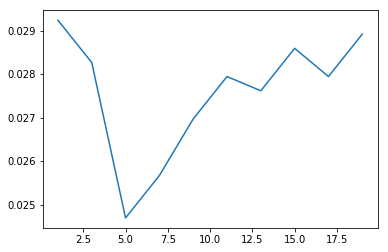

In [171]:
plt.plot(Ngh,MSE)

In [160]:
#Check Accuracy scores for predictions

([<matplotlib.axis.XTick at 0x1a195682b0>,
 <a list of 10 Text xticklabel objects>)

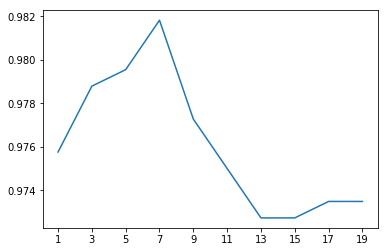

In [172]:
plt.plot(Ngh, Acc)
plt.xticks(Ngh)

In [162]:
Accuracy_scores

,Accuracy,N
0,0.975758,1
1,0.978788,3
2,0.979545,5
3,0.981818,7
4,0.977273,9
5,0.975000,11
6,0.972727,13
7,0.972727,15
8,0.973485,17
9,0.973485,19


#### We get the highest accuracy score OF 98% at N=7